In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'1.10.0'

In [3]:
EPOCHS = 20
NUM_WORDS = 1000

## IMDB Dataset

In [4]:
# limit data to NUM_WORDS most common words
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

Use multi-hot encoding on the sentences.

(This will create overfitting.)

In [5]:
def multi_hot_sequences(sequences, dimension):
    
    # create all-zero matrix
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
        
    return results

In [6]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

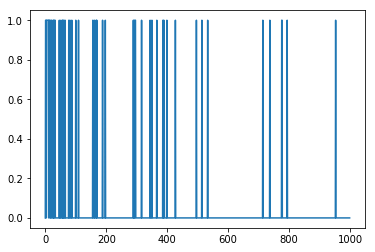

In [7]:
# visualize one review's multi_hot_encoding
random_index = random.randint(0, len(train_data))
_ = plt.plot(train_data[random_index])

## Overfitting Demo

### Baseline Model

In [8]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
baseline_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"],
    optimizer="adam"
)
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data, train_labels, batch_size=512, epochs=EPOCHS,
    validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 1s - loss: 0.6354 - acc: 0.6022 - binary_crossentropy: 0.6354 - val_loss: 0.5139 - val_acc: 0.7873 - val_binary_crossentropy: 0.5139
Epoch 2/20
 - 0s - loss: 0.3978 - acc: 0.8397 - binary_crossentropy: 0.3978 - val_loss: 0.3508 - val_acc: 0.8521 - val_binary_crossentropy: 0.3508
Epoch 3/20
 - 0s - loss: 0.3235 - acc: 0.8669 - binary_crossentropy: 0.3235 - val_loss: 0.3318 - val_acc: 0.8578 - val_binary_crossentropy: 0.3318
Epoch 4/20
 - 0s - loss: 0.3080 - acc: 0.8736 - binary_crossentropy: 0.3080 - val_loss: 0.3284 - val_acc: 0.8609 - val_binary_crossentropy: 0.3284
Epoch 5/20
 - 0s - loss: 0.3020 - acc: 0.8768 - binary_crossentropy: 0.3020 - val_loss: 0.3322 - val_acc: 0.8582 - val_binary_crossentropy: 0.3322
Epoch 6/20
 - 0s - loss: 0.2971 - acc: 0.8780 - binary_crossentropy: 0.2971 - val_loss: 0.3280 - val_acc: 0.8603 - val_binary_crossentropy: 0.3280
Epoch 7/20
 - 0s - loss: 0.2921 - acc: 0.8786 - binary_crossentropy:

### Smaller Model

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
smaller_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"],
    optimizer="adam"
)
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data, train_labels, batch_size=512, epochs=EPOCHS,
    validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 1s - loss: 0.6718 - acc: 0.5836 - binary_crossentropy: 0.6718 - val_loss: 0.6223 - val_acc: 0.6678 - val_binary_crossentropy: 0.6223
Epoch 2/20
 - 0s - loss: 0.5695 - acc: 0.7384 - binary_crossentropy: 0.5695 - val_loss: 0.5315 - val_acc: 0.7854 - val_binary_crossentropy: 0.5315
Epoch 3/20
 - 0s - loss: 0.4961 - acc: 0.8250 - binary_crossentropy: 0.4961 - val_loss: 0.4775 - val_acc: 0.8361 - val_binary_crossentropy: 0.4775
Epoch 4/20
 - 0s - loss: 0.4480 - acc: 0.8520 - binary_crossentropy: 0.4480 - val_loss: 0.4418 - val_acc: 0.8516 - val_binary_crossentropy: 0.4418
Epoch 5/20
 - 0s - loss: 0.4126 - acc: 0.8636 - binary_crossentropy: 0.4126 - val_loss: 0.4152 - val_acc: 0.8560 - val_binary_crossentropy: 0.4152
Epoch 6/20
 - 0s - loss: 0.3849 - acc: 0.8720 - binary_crossentropy: 0.3849 - val_loss: 0.3972 - val_acc: 0.8568 - val_binary_crossentropy: 0.3972
Epoch 7/20
 - 0s - loss: 0.3634 - acc: 0.8756 - binary_crossentropy:

### Bigger Model

In [12]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
bigger_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"],
    optimizer="adam"
)
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
bigger_history = bigger_model.fit(train_data, train_labels, batch_size=512, epochs=EPOCHS,
    validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.4259 - acc: 0.8032 - binary_crossentropy: 0.4259 - val_loss: 0.3392 - val_acc: 0.8540 - val_binary_crossentropy: 0.3392
Epoch 2/20
 - 2s - loss: 0.2937 - acc: 0.8773 - binary_crossentropy: 0.2937 - val_loss: 0.3269 - val_acc: 0.8579 - val_binary_crossentropy: 0.3269
Epoch 3/20
 - 2s - loss: 0.2280 - acc: 0.9104 - binary_crossentropy: 0.2280 - val_loss: 0.3705 - val_acc: 0.8384 - val_binary_crossentropy: 0.3705
Epoch 4/20
 - 2s - loss: 0.1207 - acc: 0.9618 - binary_crossentropy: 0.1207 - val_loss: 0.4039 - val_acc: 0.8515 - val_binary_crossentropy: 0.4039
Epoch 5/20
 - 2s - loss: 0.0289 - acc: 0.9948 - binary_crossentropy: 0.0289 - val_loss: 0.5095 - val_acc: 0.8487 - val_binary_crossentropy: 0.5095
Epoch 6/20
 - 2s - loss: 0.0062 - acc: 0.9997 - binary_crossentropy: 0.0062 - val_loss: 0.5899 - val_acc: 0.8527 - val_binary_crossentropy: 0.5899
Epoch 7/20
 - 2s - loss: 0.0015 - acc: 1.0000 - binary_crossentropy:

### Plot Training/Validation Loss

In [14]:
def plot_history(histories, key="binary_crossentropy"):
    
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history["val_"+key], "--", label=name.title() + " Validation")
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title() + " Train")
    
    plt.xlabel("Epochs")
    plt.ylabel(key.replace("_", " ").title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])

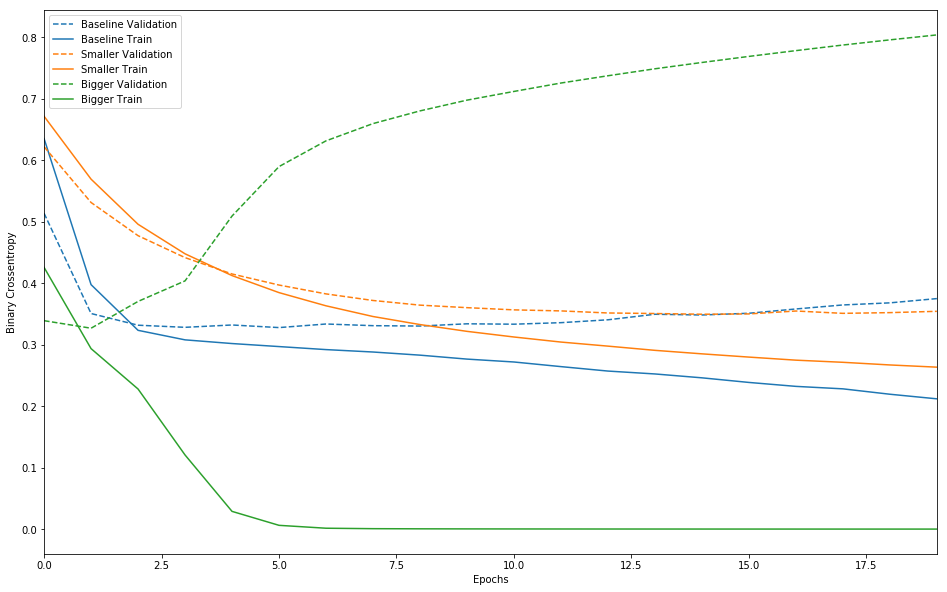

In [15]:
plot_history([
    ("baseline", baseline_history),
    ("smaller", smaller_history),
    ("bigger", bigger_history)
])

## Strategies

Methods for trying to reduce overfitting.

### Weight Regularization

In [16]:
l2_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
l2_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"],
    optimizer="adam"
)
l2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [17]:
l2_history = l2_model.fit(train_data, train_labels, batch_size=512, epochs=EPOCHS,
    validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 1.2114 - acc: 0.8030 - binary_crossentropy: 0.4231 - val_loss: 0.8446 - val_acc: 0.8540 - val_binary_crossentropy: 0.3398
Epoch 2/20
 - 2s - loss: 0.6923 - acc: 0.8716 - binary_crossentropy: 0.3091 - val_loss: 0.6214 - val_acc: 0.8592 - val_binary_crossentropy: 0.3281
Epoch 3/20
 - 2s - loss: 0.5338 - acc: 0.8814 - binary_crossentropy: 0.2861 - val_loss: 0.5289 - val_acc: 0.8608 - val_binary_crossentropy: 0.3193
Epoch 4/20
 - 2s - loss: 0.4451 - acc: 0.8952 - binary_crossentropy: 0.2566 - val_loss: 0.4917 - val_acc: 0.8599 - val_binary_crossentropy: 0.3208
Epoch 5/20
 - 2s - loss: 0.3692 - acc: 0.9230 - binary_crossentropy: 0.2060 - val_loss: 0.4925 - val_acc: 0.8566 - val_binary_crossentropy: 0.3352
Epoch 6/20
 - 2s - loss: 0.3029 - acc: 0.9507 - binary_crossentropy: 0.1458 - val_loss: 0.5212 - val_acc: 0.8496 - val_binary_crossentropy: 0.3648
Epoch 7/20
 - 2s - loss: 0.2445 - acc: 0.9762 - binary_crossentropy:

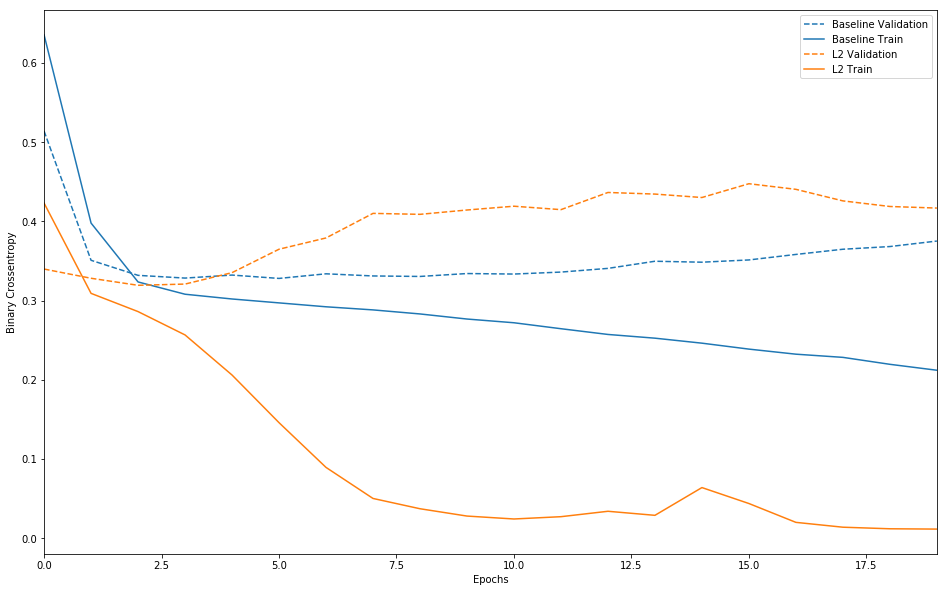

In [18]:
plot_history([
    ("baseline", baseline_history),
    ("l2", l2_history)
])

### Dropout

Zero out some entries between layers.

In [19]:
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
dpt_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy", "binary_crossentropy"],
    optimizer="adam"
)
dpt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                16016     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
dpt_history = dpt_model.fit(train_data, train_labels, batch_size=512, epochs=EPOCHS,
    validation_data=(test_data, test_labels), verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.7259 - acc: 0.5638 - binary_crossentropy: 0.6804 - val_loss: 0.6687 - val_acc: 0.7400 - val_binary_crossentropy: 0.6264
Epoch 2/20
 - 1s - loss: 0.6404 - acc: 0.6697 - binary_crossentropy: 0.6009 - val_loss: 0.5254 - val_acc: 0.8164 - val_binary_crossentropy: 0.4882
Epoch 3/20
 - 0s - loss: 0.5514 - acc: 0.7467 - binary_crossentropy: 0.5155 - val_loss: 0.4438 - val_acc: 0.8369 - val_binary_crossentropy: 0.4091
Epoch 4/20
 - 1s - loss: 0.4913 - acc: 0.7926 - binary_crossentropy: 0.4571 - val_loss: 0.3866 - val_acc: 0.8527 - val_binary_crossentropy: 0.3528
Epoch 5/20
 - 1s - loss: 0.4478 - acc: 0.8238 - binary_crossentropy: 0.4143 - val_loss: 0.3698 - val_acc: 0.8548 - val_binary_crossentropy: 0.3365
Epoch 6/20
 - 0s - loss: 0.4250 - acc: 0.8366 - binary_crossentropy: 0.3918 - val_loss: 0.3621 - val_acc: 0.8589 - val_binary_crossentropy: 0.3291
Epoch 7/20
 - 0s - loss: 0.4084 - acc: 0.8425 - binary_crossentropy:

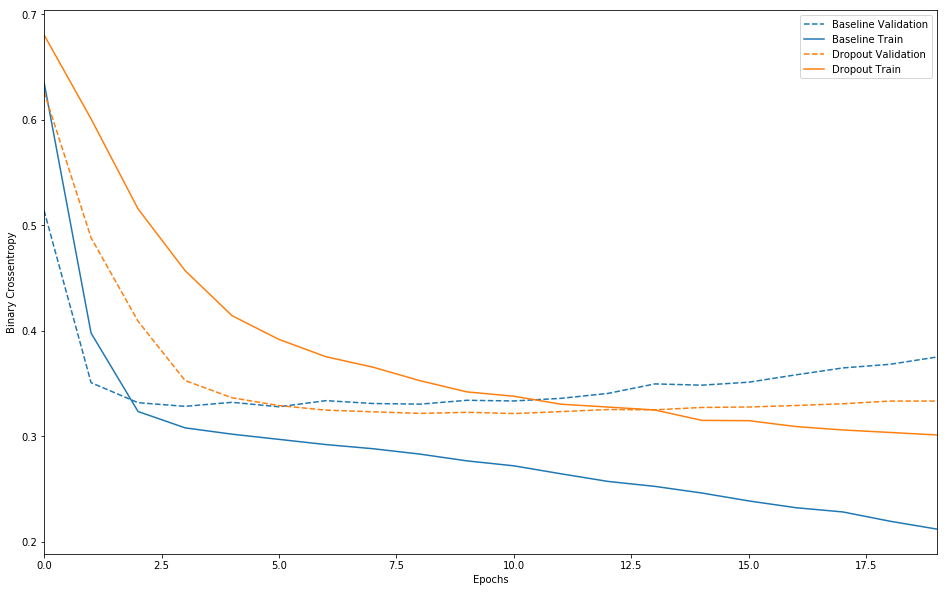

In [21]:
plot_history([
    ("baseline", baseline_history),
    ("dropout", dpt_history)
])